In [1]:
# this is the attacker's script
# using the n value, we can calculate the p and q values
# using the p and q values, we can calculate the phi value
# using the phi value, we can calculate the d value
# we use prime factorization to calculate the p and q values

from sympy import *
from rsa import *
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# repeat the process for different number of bits

number_of_bits = [ i for i in range(27, 100)]

# we will store the time taken to attack the message
times_to_attack = []

for n_number_of_bits in number_of_bits:
    while True:
        try:
            # generate the public key and private key
            e, d, n = generate_keys(n_number_of_bits)
            
            # if generated successfully, break the loop
            break
        except:
            continue
    
    # start the timer
    start_time = time.time()
    # calculate the p and q values
    p_attack, q_attack = factorint(n).keys()
    # calculate the phi value
    phi_attack = (p_attack - 1) * (q_attack - 1)
    
    # calculate the d value
    d_attack = mod_inverse(e, phi_attack)
    
    # stop the timer
    end_time = time.time()
    
    times_to_attack.append(end_time - start_time)
    
    # # check if the d values are the same and print the result
    # result = "attacked successfully" if d == d_attack else "failed to attack the message"
    # print("number of bits: ", n_number_of_bits, result)


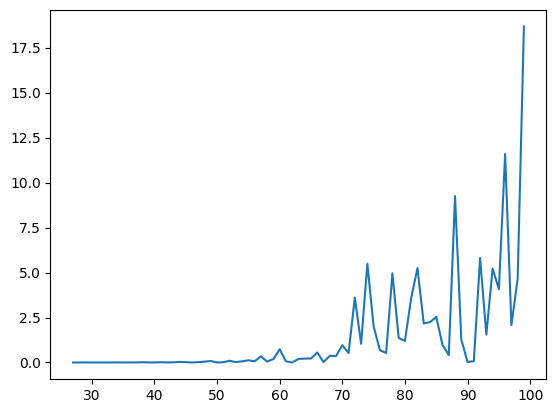

In [6]:
# plot the graph
plt.plot(number_of_bits, times_to_attack)